<h1>Pandas Practice Assignment</h1>
<li>I've done many of the steps for you so use this notebook and fill in the various cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run (a few minutes). Especially if your computer is not powerful enough. Be patient!


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below + do whatever you feel like)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below + do whatever you feel like)
<li>Break the bounding box into 100 "zones" 
<ul>
<li>Divide the longitude (-73.7526 to -74.2635) into 10 sections
<li>Divide the latitude (40.4856 to 40.9596) into 10 sections
<li>Write a function that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
</ul>
<li>Do some analysis (see below + do whatever you feel like)
<li>OPTIONAL: A quick geojson graph!

<h2>Read the data</h2>


In [5]:
#Add necessary imports and functions to read the data
import csv
import pandas as pd
df = pd.read_csv('/Users/mengranzhang/Desktop/DA/HW/hw7/yellow_tripdata_2016-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


<h2>Remove data outside the bounding box</h2>


In [6]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
# df =

In [7]:
dfnyc = df.loc[(westlimit <= df['pickup_longitude']) & (df['pickup_longitude'] <= eastlimit) & (
    df['dropoff_longitude'] <= eastlimit) & (westlimit <= df['dropoff_longitude']) & (southlimit <= df['pickup_latitude']) & (df['pickup_latitude'] <= northlimit) & (southlimit <= df['dropoff_latitude']) & (df['dropoff_latitude'] <= northlimit)]
dfnyc.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [17]:
# from datetime import datetime
import datetime
# import time
# df['duration'] = 

tpickup = dfnyc['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
tdropoff = dfnyc['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
dfnyc['duration'] = tdropoff - tpickup
dfnyc.head()
# print(c)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0 days
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0 days
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0 days
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0 days
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0 days


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [18]:
import numpy as np
dfnyc['duration'] = dfnyc['duration']/np.timedelta64(1, 's')
dfnyc['duration'].head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: duration, dtype: float64

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [21]:
dfnyc = dfnyc[(dfnyc['duration'] <= 10000)]

In [22]:
dfnyc.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07,1.068738e+07
mean,1.538162e+00,1.673961e+00,4.670407e+00,-7.397335e+01,4.075103e+01,1.033065e+00,-7.397383e+01,4.075198e+01,1.346251e+00,1.238549e+01,3.133309e-01,4.979944e-01,1.741952e+00,2.908759e-01,2.997733e-01,1.552940e+01,7.891339e+02
std,4.985415e-01,1.328390e+00,3.011549e+03,3.800593e-02,2.788292e-02,3.732872e-01,3.338987e-02,3.157431e-02,4.903291e-01,3.562622e+01,4.161322e-01,3.485144e-02,2.504813e+00,1.659055e+00,1.138490e-02,3.642516e+01,6.123039e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.426337e+01,4.048822e+01,1.000000e+00,-7.426349e+01,4.048641e+01,1.000000e+00,-3.000000e+02,-4.500000e+00,-5.000000e-01,-7.000000e+01,-1.740000e+01,-3.000000e-01,-3.008000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399164e+01,4.073757e+01,1.000000e+00,-7.399122e+01,4.073628e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,3.810000e+02
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398168e+01,4.075440e+01,1.000000e+00,-7.397978e+01,4.075475e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.160000e+01,6.280000e+02
75%,2.000000e+00,2.000000e+00,3.080000e+00,-7.396720e+01,4.076837e+01,1.000000e+00,-7.396314e+01,4.076995e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01,1.010000e+03
max,2.000000e+00,9.000000e+00,8.000010e+06,-7.375268e+01,4.095950e+01,9.900000e+01,-7.375261e+01,4.095958e+01,5.000000e+00,1.112709e+05,6.488700e+02,2.050000e+01,9.981400e+02,9.801500e+02,3.000000e-01,1.112716e+05,9.990000e+03


<h2>Plot duration and compare with a gamma distribution</h2>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')



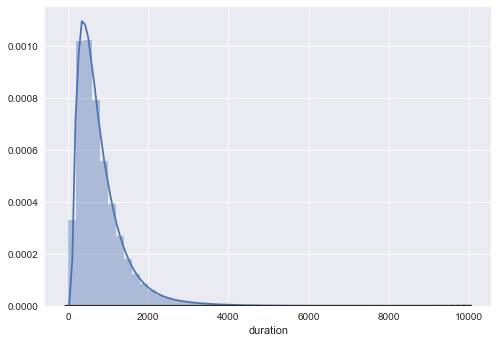

In [24]:
from scipy import stats
sns.distplot(dfnyc['duration'],kde=True,fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

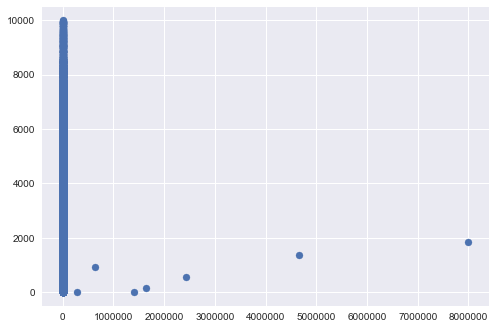

In [26]:
plt.scatter(dfnyc['trip_distance'], dfnyc['duration'])

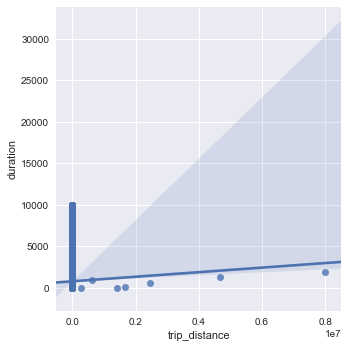

In [30]:
sns.lmplot('trip_distance','duration', data = dfnyc)

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [35]:
# tpickup = dfnyc['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
dfnyc['day_of_week'] = tpickup.apply(lambda x: datetime.date.isoweekday(x))

In [37]:
dfnyc.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0,5
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0,5
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0,5
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0,5
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0,5


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [38]:
dfnyc['pickup_hour'] = tpickup.apply(lambda x: x.hour)

In [39]:
dfnyc.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0,5,0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0,5,0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0,5,0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0,5,0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0,5,0


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

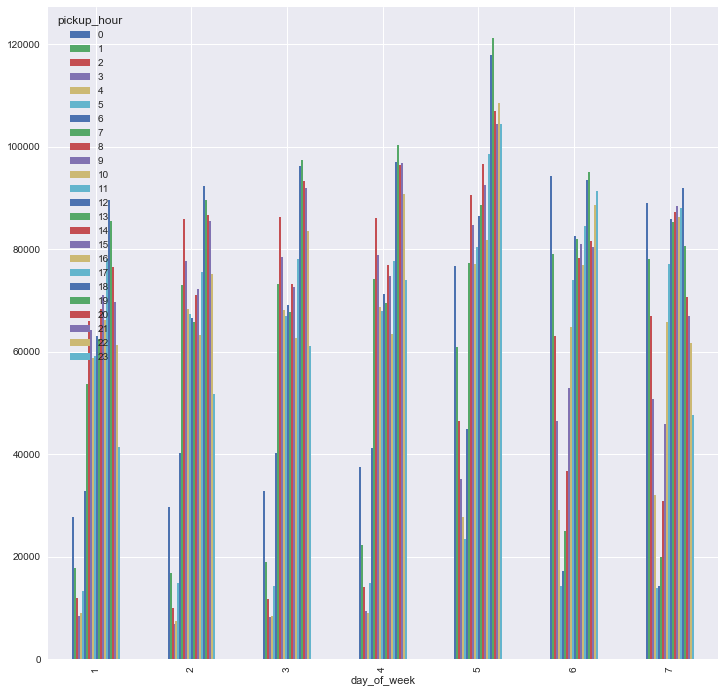

In [41]:
dayofweek_timeofday = dfnyc.groupby(['day_of_week','pickup_hour'])
dayofweek_timeofday.size().unstack().plot(kind='bar', figsize=(12,12)) 

During the weekend, there are more taxi orders during the midnight and early morning. 

<h2>Create zones</h2>

In [46]:
import numpy as np
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
lat_range = northlimit - southlimit
lon_range = eastlimit - westlimit
latitude_ranges = np.append(np.arange(southlimit+lat_range/10,northlimit,lat_range/10,dtype=float),northlimit)
longitude_ranges = np.append(np.arange(westlimit+lon_range/10,eastlimit,lon_range/10,dtype=float),eastlimit)
latitude_ranges

array([ 40.533 ,  40.5804,  40.6278,  40.6752,  40.7226,  40.77  ,
        40.8174,  40.8648,  40.9122,  40.9596])

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>
<li>I've written a part of the function for you
<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [48]:
def get_zone(lat, lon):
    for i in range(len(latitude_ranges)):
        if lat < latitude_ranges[i]:
            break

    for j in range(len(longitude_ranges)):
        if lon < longitude_ranges[j]:
            break

    return str(i) + str(j)


get_zone(40.65, -74.19)

'31'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [49]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [50]:
dfnyc['pickup_zone'] = dfnyc.apply(lambda x: get_zone(x['pickup_latitude'], x['pickup_longitude']), axis=1)
dfnyc['dropoff_zone'] = dfnyc.apply(lambda x: get_zone(x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

In [51]:
dfnyc.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.5,0.0,0.0,0.3,8.8,0.0,5,0,55,55
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.5,0.0,0.0,0.3,19.3,0.0,5,0,55,46
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.5,0.0,0.0,0.3,34.3,0.0,5,0,45,66
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.5,0.0,0.0,0.3,17.3,0.0,5,0,45,35
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.5,0.0,0.0,0.3,8.8,0.0,5,0,65,55


<h2>Calculate the following</h2>
<li>Percentage of the total that the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [92]:
total = dfnyc['pickup_zone'].count()
same_zone = dfnyc['pickup_zone'][(dfnyc['pickup_zone'] == dfnyc['dropoff_zone'])].count()
percentage = same_zone/total*100
print("%1.2f%%"%percentage)
# same_zone1 = dfnyc[(dfnyc['pickup_zone'] == dfnyc['dropoff_zone'])]['pickup_zone'].count()
# same_zone1

51.79%


In [58]:
dfnyc.groupby('pickup_zone').size().sort_values(ascending=False)

pickup_zone
55    6663978
65    1410817
66     767148
45     592012
44     328473
39     237829
56     230948
67     169908
57     113821
54      49047
46      40983
76      36254
35      15638
48       5587
36       4549
58       2380
38       2109
77       1622
75       1536
86       1516
49       1305
47       1287
25       1128
34       1018
37        926
87        874
41        650
43        482
26        466
24        366
       ...   
94         13
16         12
22         12
70         11
12         11
80         11
13         10
92         10
81         10
20          9
28          8
79          8
90          7
96          6
91          5
30          5
21          5
18          5
11          5
10          4
17          4
60          4
05          3
14          3
04          2
03          2
01          2
19          1
02          1
00          1
Length: 96, dtype: int64

Zone with the highest pickups: 55

In [59]:
dfnyc.groupby('dropoff_zone').size().sort_values(ascending=False)

dropoff_zone
55    6016218
65    1432794
66     949183
45     700632
56     334404
44     331975
46     145632
76     131352
67      94646
57      92292
39      87164
54      76413
35      76337
36      31503
48      19811
58      16231
41      15910
77      15119
86      14724
47      13598
87      10410
25      10235
34       9340
49       6907
26       6651
24       6544
37       5308
38       5269
59       4942
78       4750
       ...   
74        100
21        100
72         91
95         88
61         79
50         78
94         62
93         60
00         58
62         47
92         46
60         43
82         39
96         39
40         38
01         37
70         33
10         30
20         26
80         25
81         25
14         24
30         23
91         17
90         11
02          7
05          2
08          1
04          1
03          1
Length: 96, dtype: int64

Zone with the highest dropoffs: 55

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [65]:
hourofday_pickupzone = dfnyc.groupby(['pickup_zone', 'pickup_hour']).size().unstack()
hourofday_pickupzone

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_zone,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
11,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
12,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0


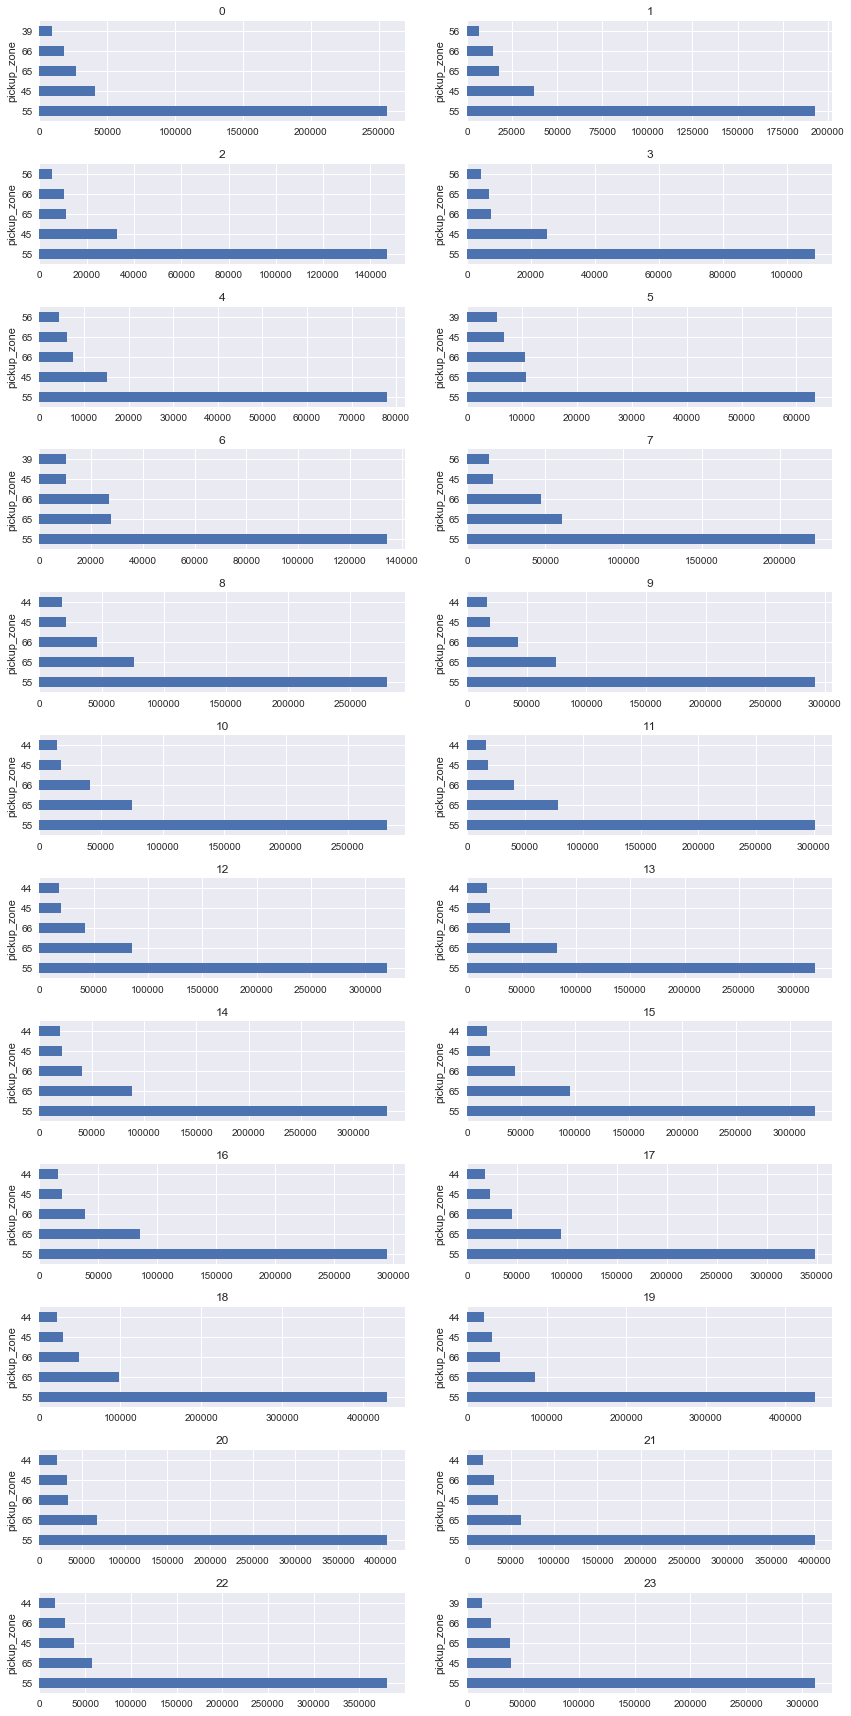

In [67]:
COL_NUM = 2
ROW_NUM = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,24))   #entire figure size is 12 12 

for i, (pickuphour, pickupzone) in enumerate(hourofday_pickupzone.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    pickupzone = pickupzone.sort_values(ascending=False)[:5] 
    pickupzone.plot(kind='barh', ax=ax)
    ax.set_title(pickuphour)

plt.tight_layout()  

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [68]:
weekofday_pickupzone = dfnyc.groupby(['pickup_zone', 'day_of_week']).size().unstack()
weekofday_pickupzone

day_of_week,1,2,3,4,5,6,7
pickup_zone,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
01,NaN,NaN,NaN,1.0,NaN,NaN,1.0
02,NaN,NaN,NaN,NaN,1.0,NaN,NaN
03,NaN,NaN,1.0,1.0,NaN,NaN,NaN
04,NaN,NaN,NaN,NaN,2.0,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,3.0,NaN
10,NaN,2.0,1.0,NaN,NaN,1.0,NaN
11,NaN,2.0,NaN,1.0,NaN,NaN,2.0
12,NaN,NaN,NaN,6.0,2.0,2.0,1.0


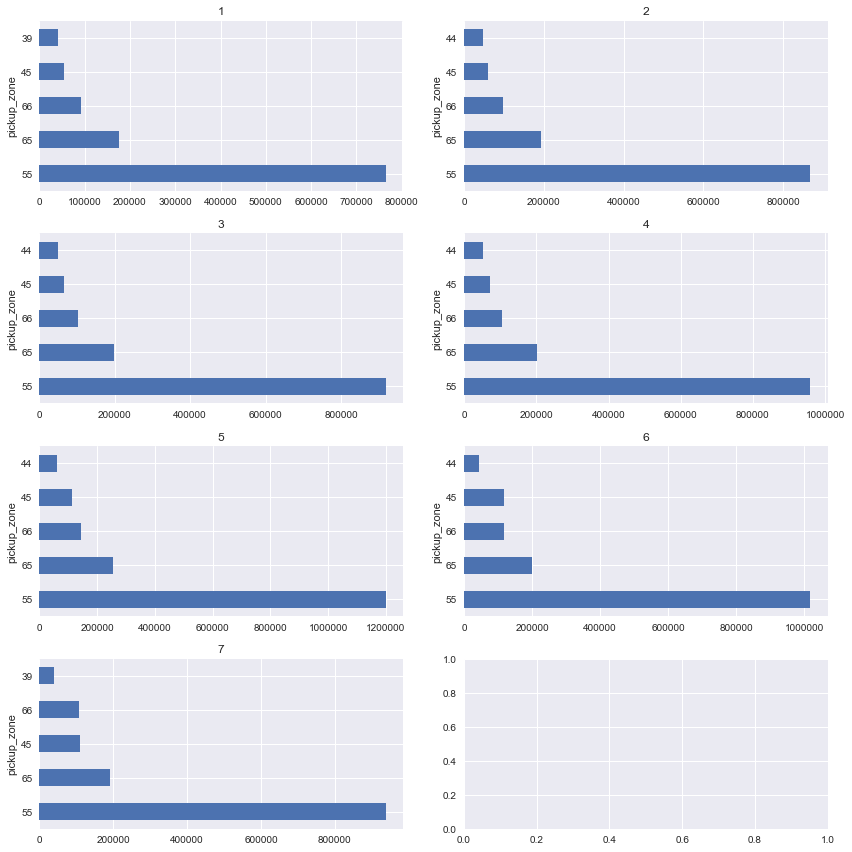

In [71]:
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))   #entire figure size is 12 12 

for i, (weekofday, pickupzone) in enumerate(weekofday_pickupzone.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    pickupzone = pickupzone.sort_values(ascending=False)[:5] 
    pickupzone.plot(kind='barh', ax=ax)
    ax.set_title(weekofday)

plt.tight_layout()  

<h1>COMPLETELY OPTIONAL!</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday
<li>Identify the most frequent dropoff zone associated with the that zone, time, day combination (this zone should be different from the pickup zone
<li>Construct a geojson object with polygons for each of the two zones
<li>Render it on an openstreet map (using geojsonio)

In [85]:
dfnyc[(1<=dfnyc['day_of_week'])&(dfnyc['day_of_week']<=5)&(8 <= dfnyc['pickup_hour'])&(dfnyc['pickup_hour']<=9)].groupby('pickup_zone').size().sort_values(ascending=False)


pickup_zone
55    479106
65    122086
66     69169
45     33170
44     30215
56     24083
67     11625
39      9779
57      8850
54      3729
76      3468
35       918
46       597
48       354
58       181
36       147
49       123
38        99
86        96
77        70
47        63
87        61
75        53
25        52
34        51
43        49
37        45
41        26
78        23
23        15
       ...  
68        10
24         8
63         7
85         7
88         6
84         5
15         5
51         4
73         4
27         3
20         3
14         3
74         3
53         3
42         3
72         2
94         2
90         2
40         2
99         2
32         1
29         1
69         1
83         1
98         1
92         1
52         1
95         1
16         1
97         1
Length: 63, dtype: int64

In [88]:
dfnyc[(1<=dfnyc['day_of_week'])&(dfnyc['day_of_week']<=5)&(8 <= dfnyc['pickup_hour'])&(dfnyc['pickup_hour']<=9) &(dfnyc['pickup_zone']=='55')].groupby('dropoff_zone').size().sort_values(ascending=False)

dropoff_zone
55    366960
65     28034
44     24158
45     19186
66     13078
56     10802
67      4992
54      3386
39      2849
57      1775
76      1188
41       693
46       427
35       238
77       125
86       119
36       114
87       111
34       101
48        87
58        82
38        81
25        65
78        63
75        49
47        46
24        35
49        34
26        34
59        28
       ...  
33         4
93         3
97         3
22         2
73         2
29         2
62         2
52         2
84         2
98         2
20         1
16         1
14         1
12         1
11         1
28         1
99         1
32         1
40         1
43         1
70         1
71         1
72         1
80         1
82         1
83         1
89         1
91         1
92         1
00         1
Length: 74, dtype: int64